# PCA on Genomic Data

In this notebook we load genomic data about viruses used in [1] and we perform a basic PCA.

**DISCLAIMER**: this notebook is not meant to reproduce the results of [1]. It just plays with the data used in the paper.

## Importing libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 

from Bio import SeqIO

## Loading the genomes of viruses

We load the data provided in the study [1]. The data come in the *FASTA* format. We convert it into lists of genomes.

In [13]:
viruses = []
seqs = []
for seq_record in SeqIO.parse("./data/bio/coronavirusAligned.fas", "fasta"):
    viruses.append(seq_record.description)
    seqs.append(seq_record.seq)    

## Converting genomes in integers

We convert the genomes expressed as letters into integers. We use a naive mapping defined in *encoding()*. We then pack the data into a *numpy* array.

In [14]:
def encoding(nucleotide):
    if (nucleotide=='-'): return int('0000',2)
    elif (nucleotide=='A'): return int('0001',2)
    elif (nucleotide=='C'): return int('0010',2)
    elif (nucleotide=='G'): return int('0100',2)
    elif (nucleotide=='T'): return int('1000',2)
    
    elif (nucleotide=='R'): return int('0101',2)
    elif (nucleotide=='Y'): return int('1010',2)
    elif (nucleotide=='S'): return int('0110',2)
    elif (nucleotide=='W'): return int('1001',2)
    elif (nucleotide=='K'): return int('1100',2)
    elif (nucleotide=='M'): return int('0011',2)
    
    elif (nucleotide=='B'): return int('1110',2)
    elif (nucleotide=='D'): return int('1101',2)
    elif (nucleotide=='H'): return int('1011',2)
    elif (nucleotide=='V'): return int('0111',2)
    
    elif (nucleotide=='N'): return int('1111',2)
    
    else: print(nucleotide)

In [15]:
seqs_list = [list(map(encoding, seq)) for seq in seqs]
seq_array = np.array(list(seqs_list))

## Looking at the data

We take a look at our datamatrix. It contains 267 samples of viruses, each one described by 45542 aligned nucleotides. If we plot it using *matshow()* we get a short-and-wide matrix.

In [16]:
seq_array.shape

(267, 45542)

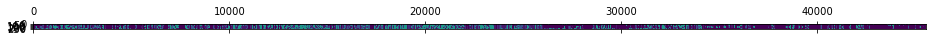

In [17]:
plt.matshow(seq_array)

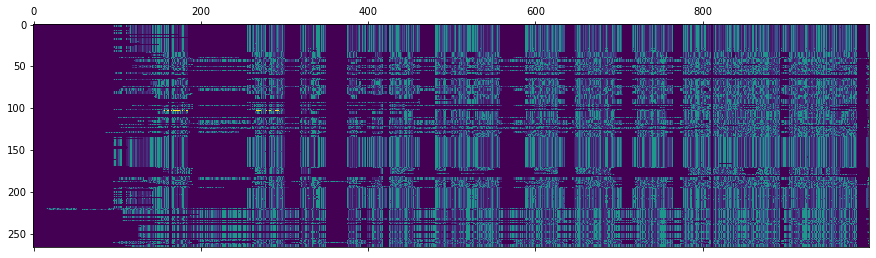

In [18]:
plt.matshow(seq_array[:,0:1000])

## Performing PCA

We train a *PCA* module computing the first 2 prinicipal components.

In [19]:
model = PCA(n_components=2)
model.fit(seq_array)
Z = model.transform(seq_array)

## Plotting the PCA representations

For the sake of readability of our plots, we first select few labels of interest (*MERS*, *SARSCoV2*, *OC43*, *HKU1*) out of all the 267 labels. We then plot the PCA representations enriched with the chosen labels.

In [20]:
labels = [' '] * len(viruses) 

for i,v in enumerate(viruses):
    if 'MERS' in v:
        labels[i] = 'MERS'
    if 'SARSCoV2' in v:
        labels[i] = 'SARSCoV2'
    if 'OC43' in v:
        labels[i] = 'OC43'
    if 'HKU1' in v:
        labels[i] = 'HKU1'

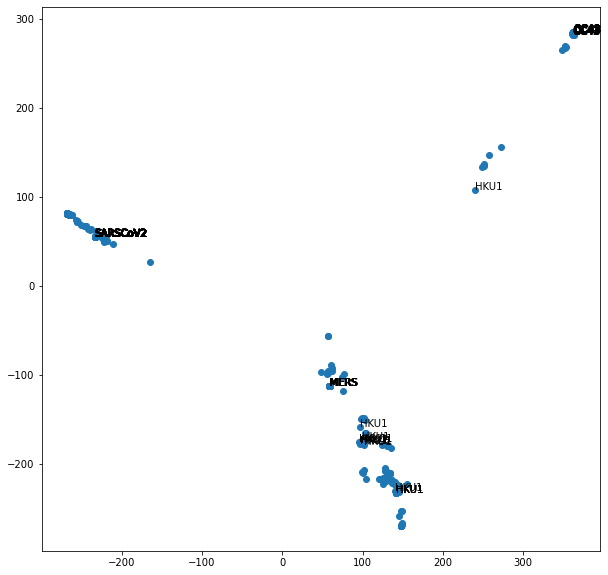

In [21]:
fig,ax = plt.subplots(figsize = (10,10))
ax.scatter(Z[:,0],Z[:,1])

for i,label in enumerate(labels):
    ax.annotate(label, (Z[i,0],Z[i,1]))

## References

\[1\] Konishi, Tomokazu. "Principal component analysis of coronaviruses reveals their diversity and seasonal and pandemic potential." [PloS one 15.12 (2020): e0242954](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0242954)